# Boston Housing Dataset Assignment
#### Disusun Oleh : Santriana Pratama

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
plt.style.use('ggplot')

### Load Dataset

In [3]:
df = pd.read_csv('~/Documents/Machine Learning/Meet 4/boston_housing.csv')

### Justifikasi Variabel di Dataset
- CRIM - tingkat kejahatan per kapita suatu kota
- ZN - proporsi tanah perumahan dikategorikan untuk banyak lebih dari 25.000 sq.ft.
- INDUS - proporsi hektar bisnis non-ritel per kota.
- CHAS - Variabel dummy Sungai Charles (1 jika saluran membatasi sungai; 0 sebaliknya)
- NOX - konsentrasi oksida nitrat (parts per 10 juta)
- RM - rata-rata jumlah kamar per hunian
- AGE - proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940
- DIS - jarak ke lima pusat kerja Boston
- RAD - indeks aksesibilitas ke jalan raya radial
- TAX - tarif pajak properti nilai penuh per $10.000

- PTRATIO - rasio murid-guru menurut kota
- B - 1000(Bk - 0.63)^2 di mana Bk adalah proporsi orang kulit hitam menurut kota
- LSTAT - % status penduduk yang lebih rendah
- MEDV - Nilai rata-rata rumah yang ditempati pemilik di $1000-an

Penjelasan lebih lanjut untuk dataset : http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Read Dataframe

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0


In [7]:
print('Total Rows: ', df.shape[0])
print('Total Columns: ', df.shape[1])

Total Rows:  506
Total Columns:  14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

#### Check Value

In [10]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [11]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

#### Single Variable

##### Categorical Data

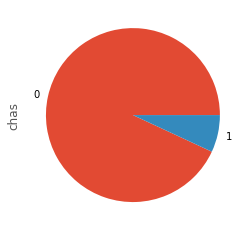

In [13]:
# melakukan plot untuk kolom 'chas'
plot_pie1 = df['chas'].value_counts().plot(kind='pie')
plt.show()

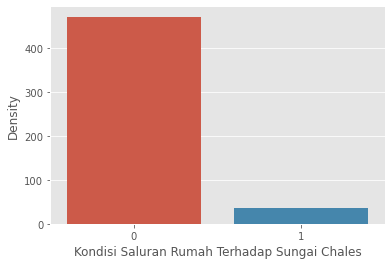

In [14]:
sns.countplot(x=df['chas'])
plt.xlabel('Kondisi Saluran Rumah Terhadap Sungai Chales')
plt.ylabel('Density')
plt.show()

In [15]:
# pada pie chart di atas ditampilkan variable 'chas' yang menunjukan posisi saluran rumah
# terhadap sungai Charles bahwa jumlah saluran rumah yang tidak membatasi sungai Charles 
# lebih banyak dibandingkan dengan jumlah saluran rumah yang membatasi saluran Charles

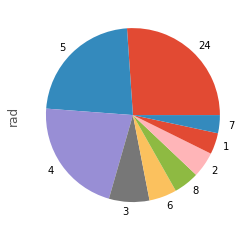

In [16]:
# melakukan plot untuk kolom 'rad'
plot_pie2 = df['rad'].value_counts().plot(kind='pie')
plt.show()

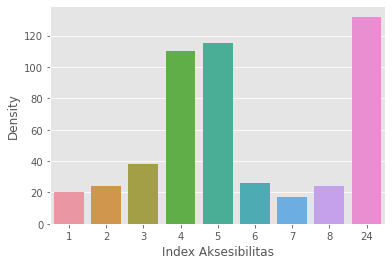

In [17]:
sns.countplot(x=df['rad'])
plt.xlabel('Index Aksesibilitas')
plt.ylabel('Density')
plt.show()

In [18]:
# Pada pie chart di atas ditampilkan variable 'rad' yang menunjukan indeks aksesibilitas ke jalan raya melingkar
# bahwa tiga jumlah rumah terbanyak berada pada index aksesibilitas nomer 24, 5, dan 4.

##### Numerical Data

In [19]:
# mengelompokan data numerical menjadi 1 variable
numerical_feature = ['crim','zn','indus','nox','rm','age','dis','tax','ptratio',
                    'b','lstat','medv']

<AxesSubplot:xlabel='medv', ylabel='Density'>

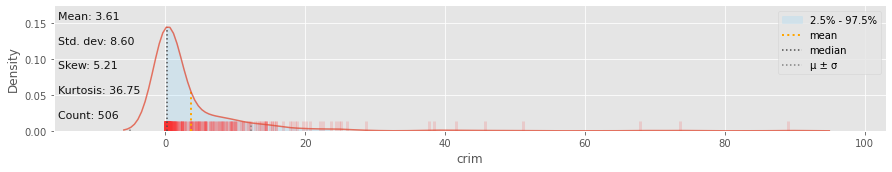

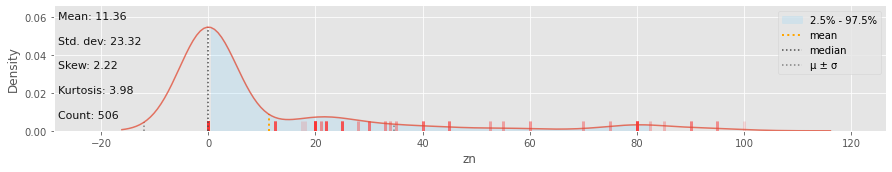

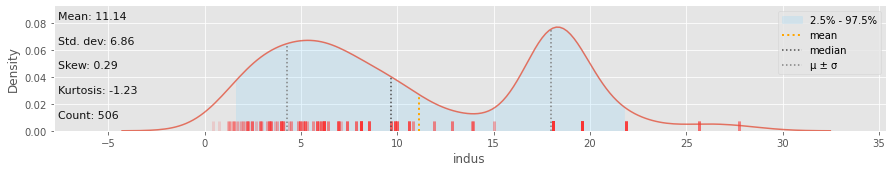

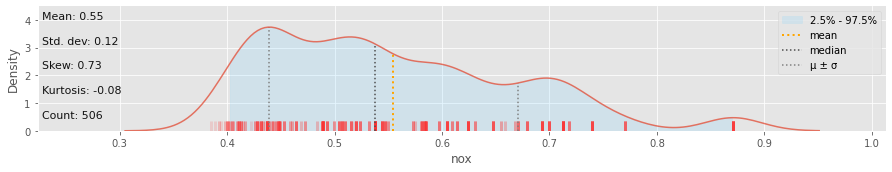

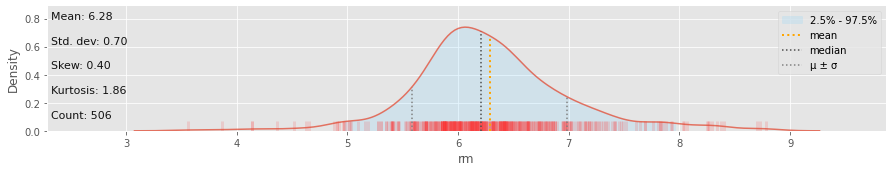

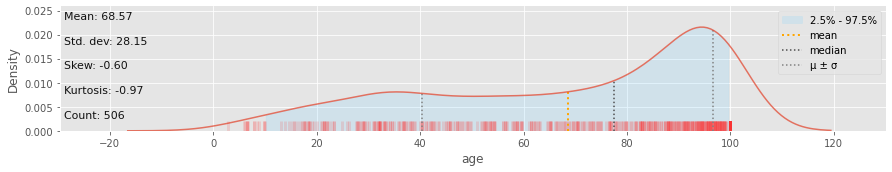

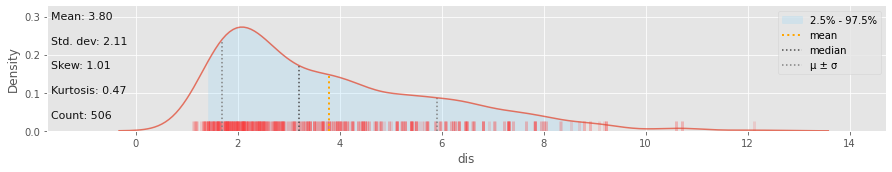

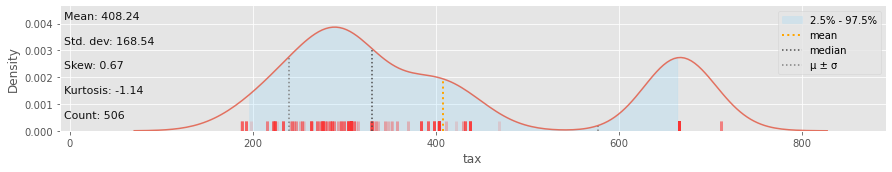

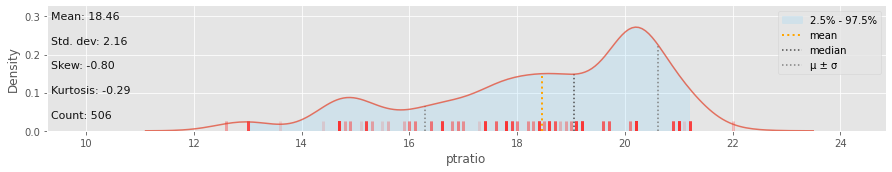

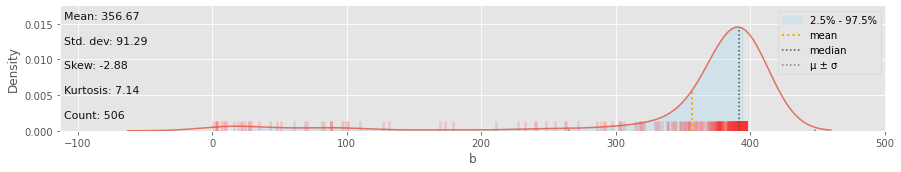

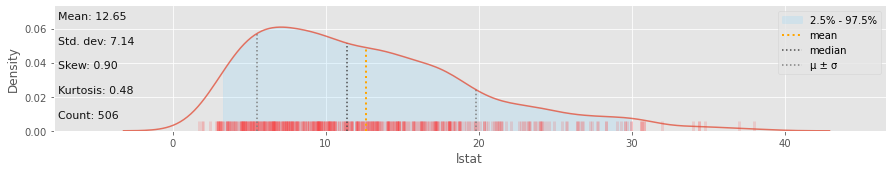

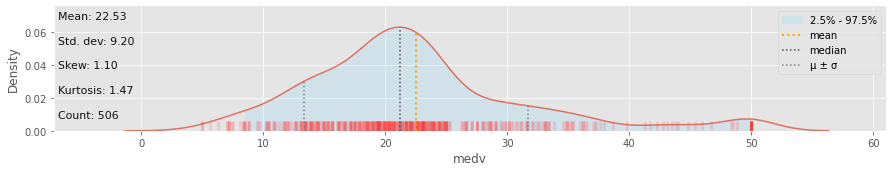

In [20]:
klib.dist_plot(df[numerical_feature])

In [21]:
# Insight:
# 1.pada feature 'crim' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang sangat tinggi yang berarti data tertumpuk pada satu titik dan
#   nilai skewness positif 5 yang berarti grafik menceng ke kanan
# 2.pada feature 'zn' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai skewness positif 2,2 yang berarti grafik menceng ke kanan meskipun nilai kurtosis 
#   yang mendekati nilai ideal (3) yang berarti data tidak tertumpuk pada satu titik
# 3.pada feature 'indus' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai negatif sehingga mengakibatkan munculnya 2 puncak pada persebaran
#   data
# 4.pada feature 'nox' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai negatif sehingga mengakibatkan data tidak menunjukan ukuran
#   pemusatan data
# 5.pada feature 'rm' ditunjukkan bahwa data terdistribusi cukup baik, hal ini ditunjukkan
#   oleh nilai kurtosis dan nilai skewness yang mendekati kondisi ideal (skewness = 0, kurtosis =1)
# 6.pada feature 'age' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai negatif sehingga mengakibatkan data tidak menunjukan ukuran
#   pemusatan data dan nilai skewness negatif -0,6 yang berarti grafik menceng ke kiri
# 7.pada feature 'dis' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai rendah dibanding dengan kondisi idealnya sehingga mengakibatkan data tidak menunjukan ukuran
#   pemusatan data dan nilai skewness positif 1.01 yang berarti grafik menceng ke kanan
# 8.pada feature 'tax' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai negatif sehingga mengakibatkan munculnya 2 puncak pada persebaran
#   data
# 9.pada feature 'ptratio' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai negatif sehingga mengakibatkan data tidak menunjukan ukuran
#   pemusatan data dan nilai skewness negatif -0,8 yang berarti grafik menceng ke kiri
# 10.pada feature 'b' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai skewness negatif -2.88 yang berarti grafik menceng ke kiri dan nilai kurtosis 
#   yang cukup tinggi yang berarti data tidak menunjukan ukuranpemusatan
# 11.pada feature 'lstat' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang bernilai rendah dibanding dengan kondisi idealnya sehingga mengakibatkan 
#   data tidak menunjukan ukuran pemusatan data
# 12.pada feature 'medv' ditunjukkan bahwa data terdistribusi tidak baik, hal ini ditunjukkan
#   oleh nilai kurtosis yang rendah dibandingkan dengan nilai idealnya meskupun nilai skewness 
#   yang mendekati kondisi ideal (skewness = 0)

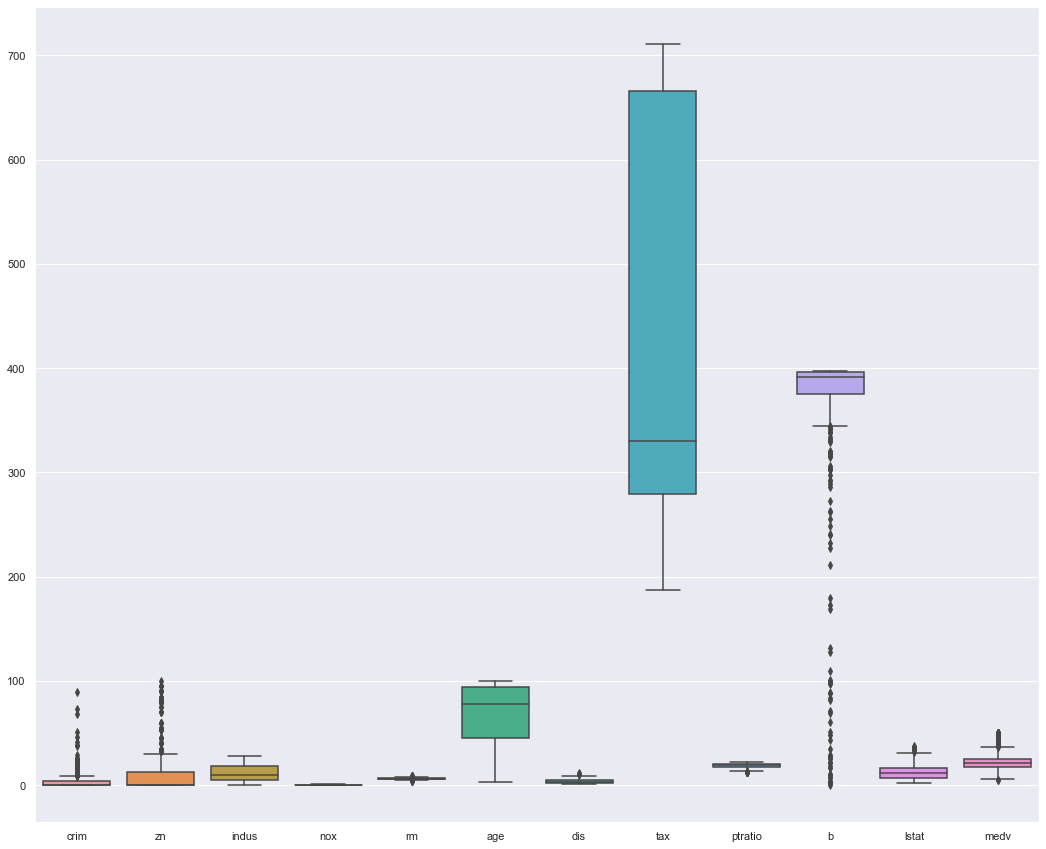

In [22]:
sns.set(rc = {'figure.figsize':(18,15)})
sns.boxplot(data=df[numerical_feature])
plt.show()

In [23]:
# Insight:
# Pada boxplot ditunjukkan bahwa hampir setiap feature pada dataset memiliki nilai outlier dengan pemilik jumlah nilai
# outlier terbanyak terdapat pada feature 'b' dan fitur 'crim'. Sedangkan feature yang tidak memiliki outlier yaitu
# terdapat pada feature 'indus','age', dan 'tax'

#### Two Variable

[Text(0.5, 0, 'Umur'),
 Text(0, 0.5, 'Nilai harga median dari rumah dalam $1000')]

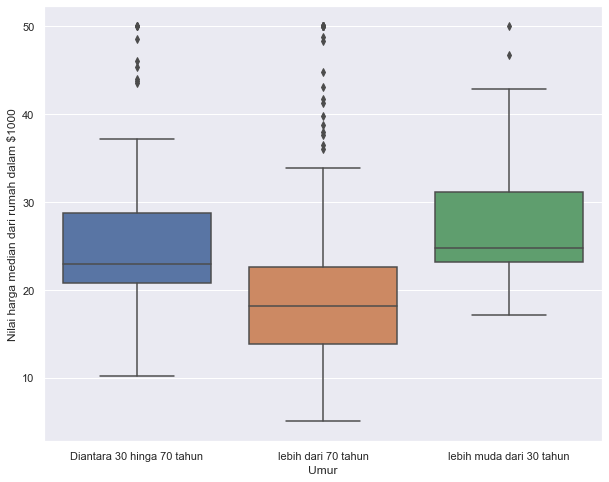

In [24]:
sns.set(rc={'figure.figsize': (10,8)})
df_age = df.copy()
df_age.loc[(df['age'] <= 30), 'Age_Group'] = "lebih muda dari 30 tahun"
df_age.loc[(df['age'] > 30) & (df['age'] < 70), 'Age_Group'] = "Diantara 30 hinga 70 tahun"
df_age.loc[(df['age'] >= 70), 'Age_Group'] = "lebih dari 70 tahun"

boxplot = sns.boxplot(x = 'Age_Group', y = 'medv', data = df_age)
boxplot.set(xlabel = 'Umur',
            ylabel = 'Nilai harga median dari rumah dalam $1000')

In [25]:
# insight
# 1. untuk kategori umur diantara 30 hingga 70 tahun memiliki nilai median di kisaran $22000
# 2. untuk kategori umur lebih dari 70 tahun memiliki nilai median di kisaran $19000
# 3. untuk kategori umur lebih muda dari 30 tahun memiliki nilai median di kisaran $25000
# dengan begitu kategori yang memiliki harga median rumah yang tertinggi terdapat pada kategori usia lebih muda dari 30 tahun.

Text(0.5, 0, 'Nilai harga median dari rumah dalam $1000')

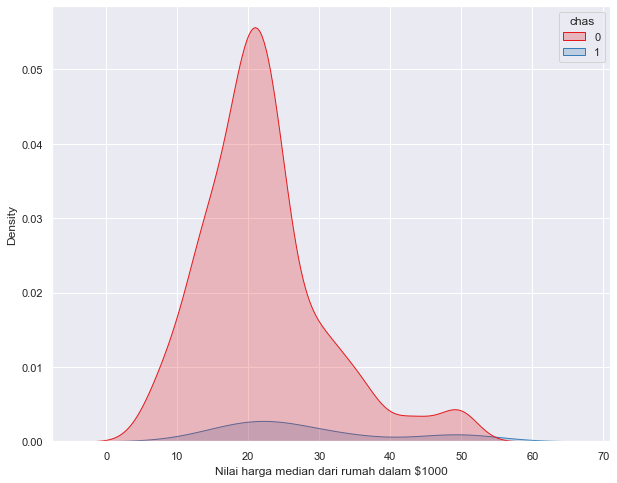

In [26]:
sns.kdeplot(data=df, x="medv", hue="chas", palette='Set1',shade=True)
plt.xlabel('Nilai harga median dari rumah dalam $1000')

In [27]:
# Insight:
# pada grafik diatas ditunjukkan bahwa nilai median dari rumah yang yang dikategorikan berdasarkan posisi rumah terhadap sungai Charles tersebar diantara $20000 - $30000

Text(0.5, 0, 'Nilai harga median dari rumah dalam $1000')

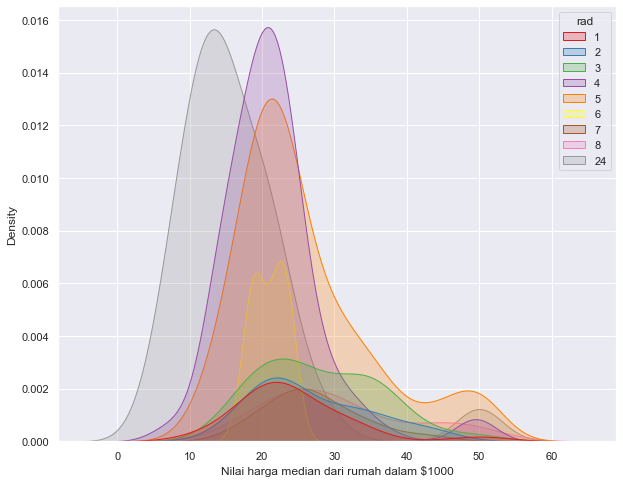

In [28]:
sns.kdeplot(data=df, x="medv", hue="rad", palette='Set1', shade=True)
plt.xlabel('Nilai harga median dari rumah dalam $1000')

In [29]:
# Insight:
# pada grafik diatas ditunjukkan bahwa nilai median dari rumah yang dikategorikan berdasarkan aksesibilitas jalan raya melingkar 
# tersebar pada rentang $10000 - $30000

<AxesSubplot:xlabel='crim', ylabel='medv'>

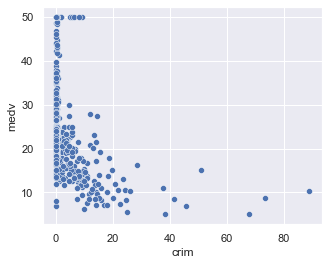

In [30]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="crim", y="medv")

<AxesSubplot:xlabel='zn', ylabel='medv'>

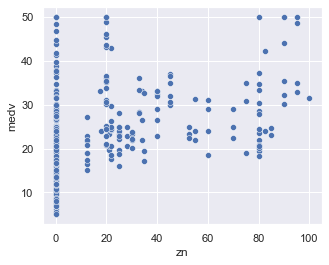

In [31]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="zn", y="medv")

<AxesSubplot:xlabel='indus', ylabel='medv'>

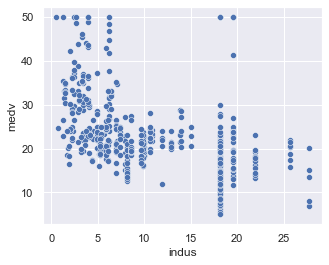

In [32]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="indus", y="medv")

<AxesSubplot:xlabel='nox', ylabel='medv'>

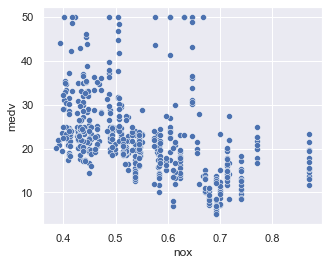

In [33]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="nox", y="medv")

<AxesSubplot:xlabel='rm', ylabel='medv'>

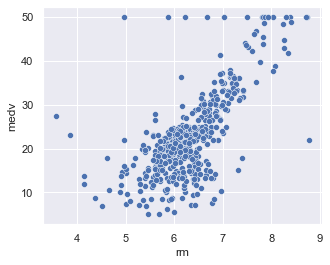

In [34]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="rm", y="medv")

<AxesSubplot:xlabel='age', ylabel='medv'>

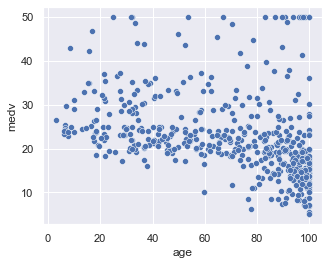

In [35]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="age", y="medv")

<AxesSubplot:xlabel='dis', ylabel='medv'>

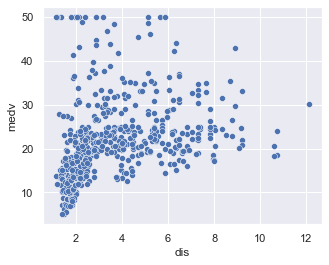

In [36]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="dis", y="medv")

<AxesSubplot:xlabel='tax', ylabel='medv'>

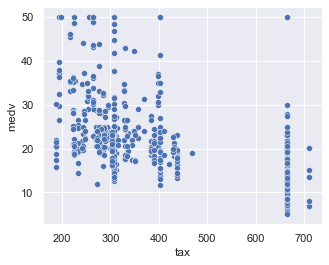

In [37]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="tax", y="medv")

<AxesSubplot:xlabel='ptratio', ylabel='medv'>

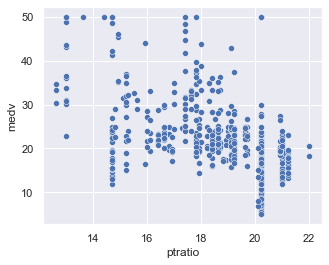

In [38]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="ptratio", y="medv")

<AxesSubplot:xlabel='b', ylabel='medv'>

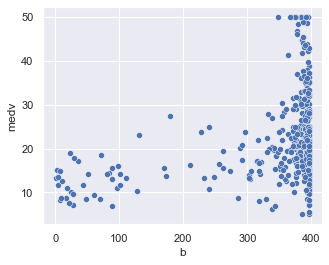

In [39]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="b", y="medv")

<AxesSubplot:xlabel='lstat', ylabel='medv'>

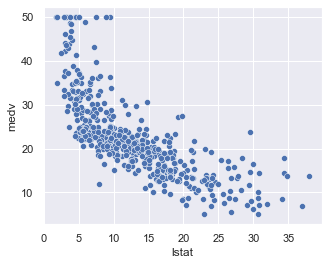

In [40]:
sns.set(rc={'figure.figsize': (5,4)})
sns.scatterplot(data=df, x="lstat", y="medv")

In [41]:
# Insight:
# Hasil scatterplot di atas menunjukan hubungan antara feature numeric pada dataset dengan feature medv
# dapat dilihat bahwa feature rm (rata-rata jumlah kamar per hunian) memiliki korelasi positif
# dengan feature medv (nilai harga median dari rumah dalam $1000), sedangkan feature lstat (% status penduduk yang lebih rendah)
# memiliki korelasi negatif dengan feature medv.

#### Multi Variable

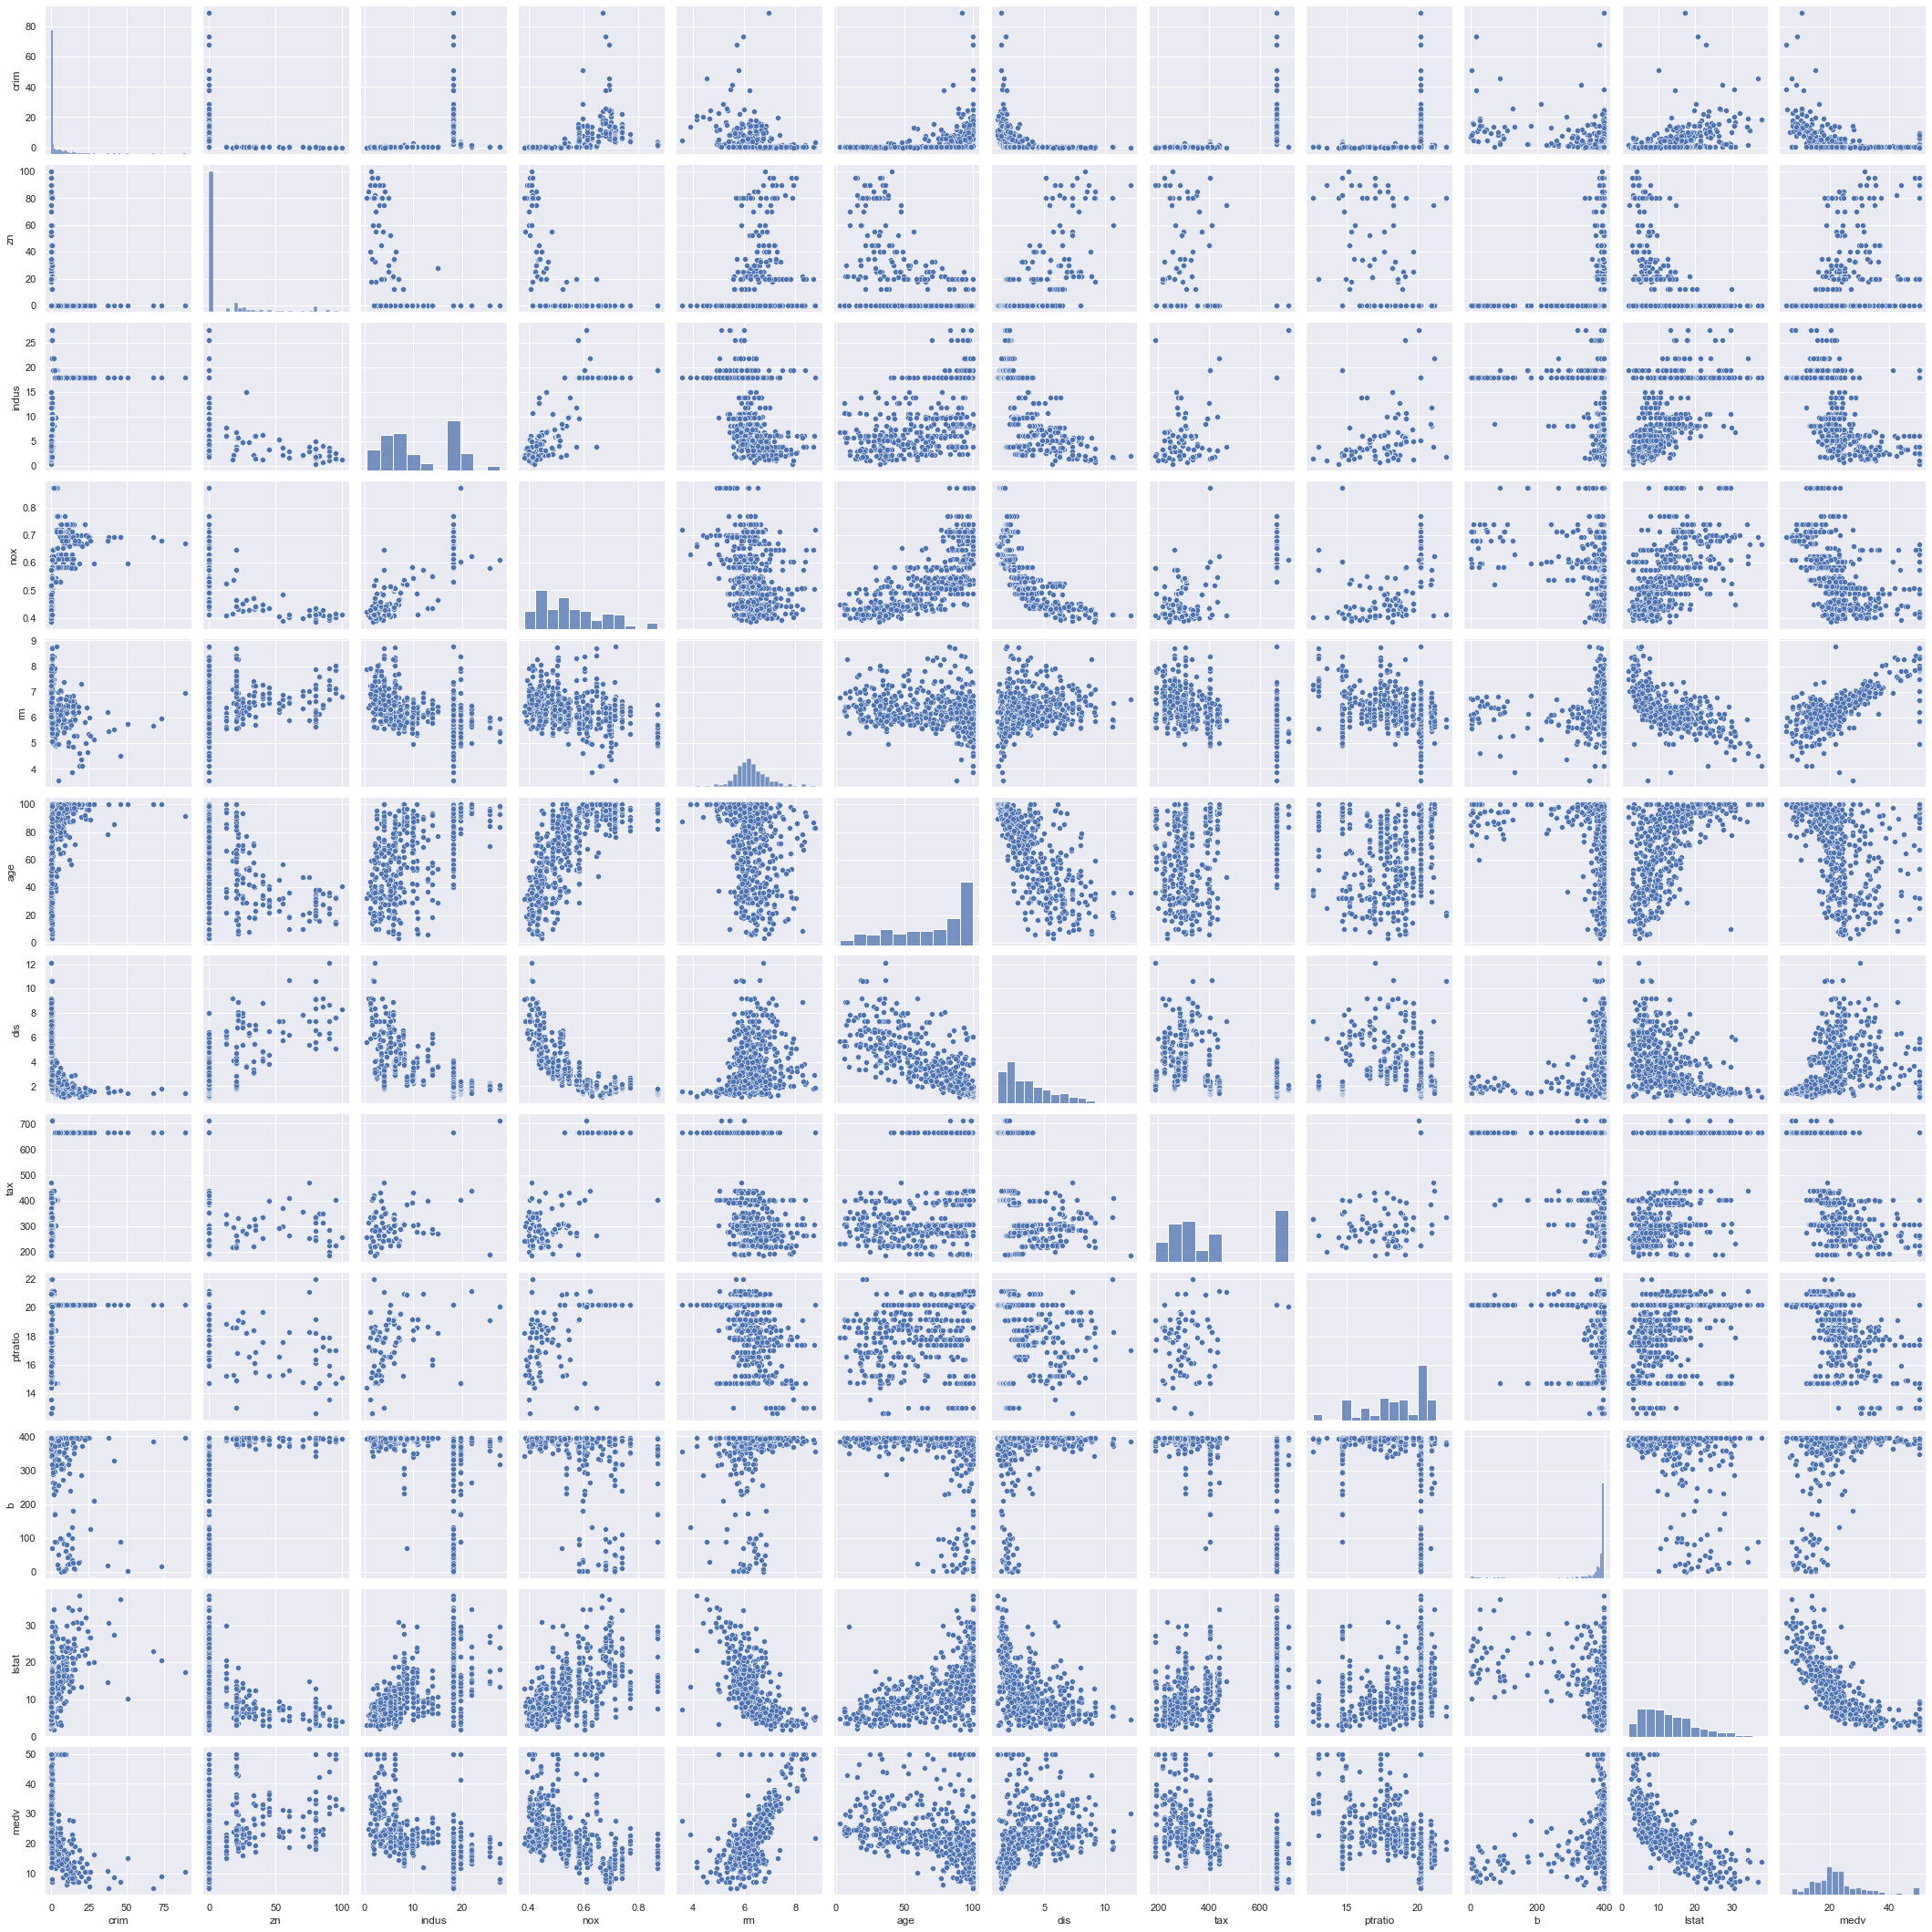

In [42]:
sns.pairplot(data=df[numerical_feature])

In [43]:
# Insight :
# pada paiplot diatas ditunjukkan beberapa korelasi antara feature pada dataset yang memiliki korelasi tinggi hingga yang tidak memiliki korelasi
# Dikarenakan kita ingin memprediksi feature medv, maka korelasi yang kuat yaitu dengan feature lstat dan feature rm

<function matplotlib.pyplot.show(close=None, block=None)>

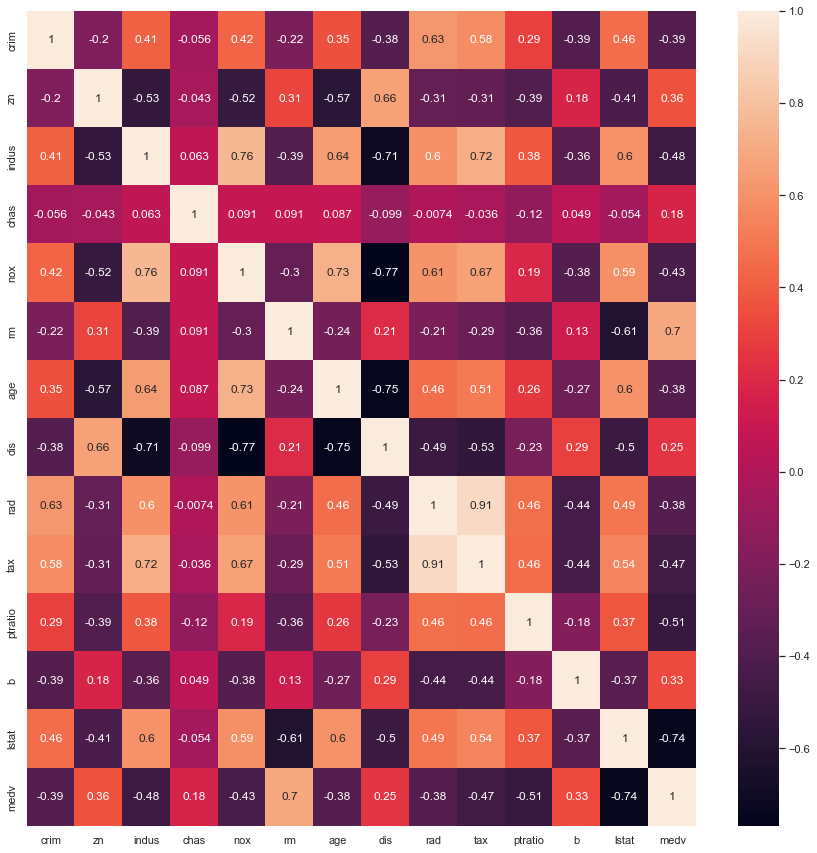

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True)
plt.show

In [45]:
# untuk mendukung pernyataan pada pairplot, ditunjukkan plot heatmap untuk melihat nilai korelasi yang sebenarnya
# diantara masing - masing feature, disini saya menggunakan feature lstat dengan feature rm untuk memprediksi feature medv
# dikarenakan kedua feature tersebut memiliki nilai R-square lebih dari +- 0,7 yang artinya menunjukkan tingkat korelasi yang tinggi

### Data Preprocessing

In [46]:
df_pre = df.copy()

In [47]:
df_pre.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [48]:
df_pre.drop(['crim','zn','nox','age','dis','b','chas','rad','indus'], axis=1, inplace=True)
df_pre

,rm,tax,ptratio,lstat,medv
0,6.575,296,15.3,4.98,24.0
1,6.421,242,17.8,9.14,21.6
2,7.185,242,17.8,4.03,34.7
3,6.998,222,18.7,2.94,33.4
4,7.147,222,18.7,5.33,36.2
...,...,...,...,...,...
501,6.593,273,21.0,9.67,22.4
502,6.120,273,21.0,9.08,20.6
503,6.976,273,21.0,5.64,23.9
504,6.794,273,21.0,6.48,22.0


#### Feature Selection

<AxesSubplot:>

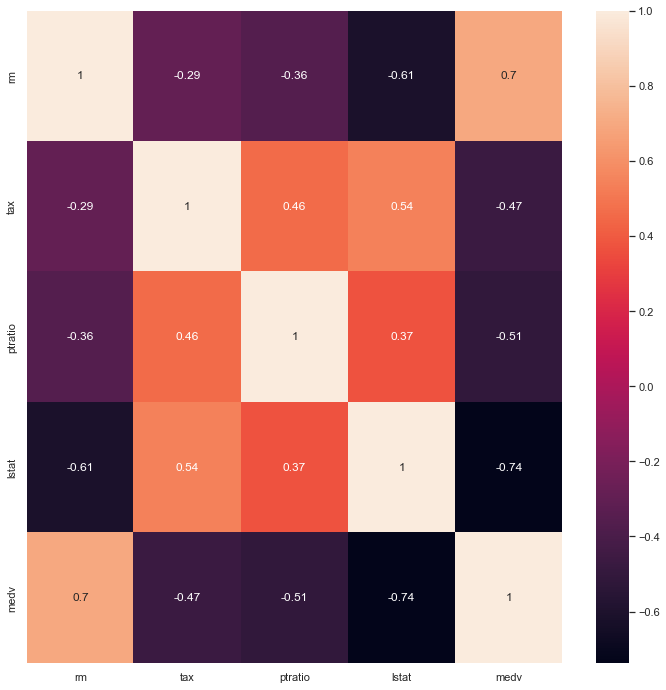

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(df_pre.corr(), annot=True)

In [50]:
cor_target = abs(df_pre.corr()['medv'])

relevant_features = cor_target[cor_target>0.48]
relevant_features

rm         0.695360
ptratio    0.507787
lstat      0.737663
medv       1.000000
Name: medv, dtype: float64

#### Analisis Multicolinieaarity

VIF memungkinkan kita untuk menentukan kekuatan korelasi antara berbagai variabel independen. VIF dihitung dengan mengambil variabel dan regresi terhadap setiap variabel lainnya. Jika nilai VIF bernilai 1, maka feature tidak memiliki korelasi apapun. Sedangkan jika nilai VIF berada di atas 5 atau 10 (tergantung kondisi), maka feature memiliki korelasi yang tinggi antar variabel independen lainnya.

In [51]:
x = df_pre[relevant_features.index[0:-1]].values
x

array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ],
       [ 7.185, 17.8  ,  4.03 ],
       ...,
       [ 6.976, 21.   ,  5.64 ],
       [ 6.794, 21.   ,  6.48 ],
       [ 6.03 , 21.   ,  7.88 ]])

In [52]:
features = relevant_features.index[0:-1]

In [53]:
vif = [variance_inflation_factor(x, i) for i in range(len(x.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T

,rm,ptratio,lstat
VIF,36.068093,51.797351,5.855408


In [54]:
# Insight:
# pada nilai di atas terlihat bahwa nilai VIF lebih dari 5 yang berarti feature memiliki korelasi yang tinggi antar variabel independen lainnya

#### Removing Outlier

##### IQR Method

In [55]:
q1 = df_pre.quantile(0.25)
q3 = df_pre.quantile(0.75)
IQR = q3-q1
print(IQR)

rm           0.738
tax        387.000
ptratio      2.800
lstat       10.005
medv         7.975
dtype: float64


In [56]:
print(q1.shape)
print(q3.shape)

(5,)
(5,)


In [57]:
iqr_df_pre = df_pre[~((df_pre < (q1 - 1.5 * IQR)) | (df_pre > (q3 + 1.5 * IQR))).any(axis=1)]

In [58]:
iqr_df_pre.shape

(443, 5)

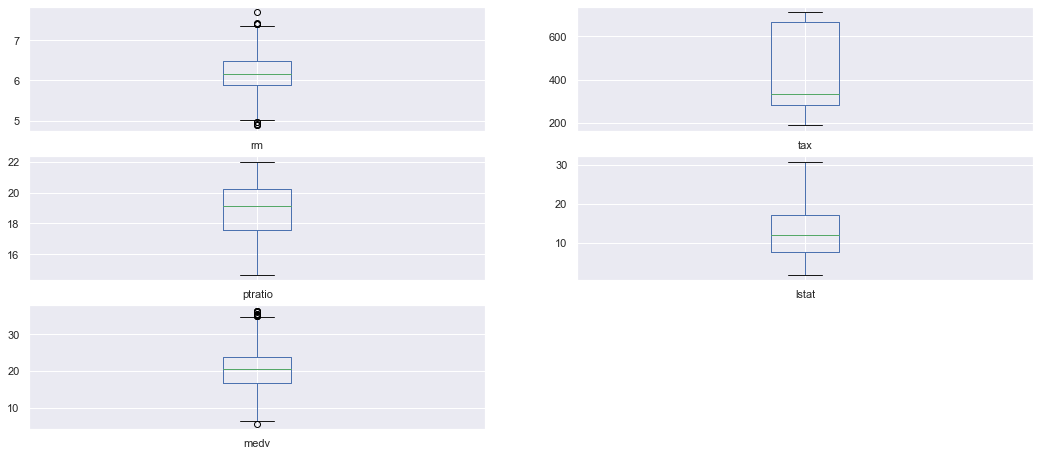

In [59]:
iqr_df_pre.plot(kind='box', subplots=True, layout=(6,2), figsize=(18,16))
plt.show()

#### Scaling
#### Menggunakan Min Max Scaler

In [63]:
mx = MinMaxScaler()

In [64]:
feature_scaled = iqr_df_pre.copy()
print(feature_scaled)

        rm  tax  ptratio  lstat  medv
0    6.575  296     15.3   4.98  24.0
1    6.421  242     17.8   9.14  21.6
2    7.185  242     17.8   4.03  34.7
3    6.998  222     18.7   2.94  33.4
4    7.147  222     18.7   5.33  36.2
..     ...  ...      ...    ...   ...
501  6.593  273     21.0   9.67  22.4
502  6.120  273     21.0   9.08  20.6
503  6.976  273     21.0   5.64  23.9
504  6.794  273     21.0   6.48  22.0
505  6.030  273     21.0   7.88  11.9

[443 rows x 5 columns]


In [65]:
feature_scaled['mx_rm'] = mx.fit_transform(feature_scaled[['rm']])
feature_scaled['mx_tax'] = mx.fit_transform(feature_scaled[['tax']])
feature_scaled['mx_ptratio'] = mx.fit_transform(feature_scaled[['ptratio']])
feature_scaled['mx_lstat'] = mx.fit_transform(feature_scaled[['lstat']])

In [66]:
feature_scaled

,rm,tax,ptratio,lstat,medv,mx_rm,mx_tax,mx_ptratio,mx_lstat
0,6.575,296,15.3,4.98,24.0,0.602988,0.208015,0.082192,0.104058
1,6.421,242,17.8,9.14,21.6,0.548203,0.104962,0.424658,0.248352
2,7.185,242,17.8,4.03,34.7,0.819993,0.104962,0.424658,0.071106
3,6.998,222,18.7,2.94,33.4,0.753469,0.066794,0.547945,0.033299
4,7.147,222,18.7,5.33,36.2,0.806475,0.066794,0.547945,0.116198
...,...,...,...,...,...,...,...,...,...
501,6.593,273,21.0,9.67,22.4,0.609392,0.164122,0.863014,0.266736
502,6.120,273,21.0,9.08,20.6,0.441124,0.164122,0.863014,0.246271
503,6.976,273,21.0,5.64,23.9,0.745642,0.164122,0.863014,0.126951
504,6.794,273,21.0,6.48,22.0,0.680896,0.164122,0.863014,0.156087


In [67]:
feature_scaled.drop(['rm','tax','ptratio','lstat'], axis=1, inplace=True)
feature_scaled

,medv,mx_rm,mx_tax,mx_ptratio,mx_lstat
0,24.0,0.602988,0.208015,0.082192,0.104058
1,21.6,0.548203,0.104962,0.424658,0.248352
2,34.7,0.819993,0.104962,0.424658,0.071106
3,33.4,0.753469,0.066794,0.547945,0.033299
4,36.2,0.806475,0.066794,0.547945,0.116198
...,...,...,...,...,...
501,22.4,0.609392,0.164122,0.863014,0.266736
502,20.6,0.441124,0.164122,0.863014,0.246271
503,23.9,0.745642,0.164122,0.863014,0.126951
504,22.0,0.680896,0.164122,0.863014,0.156087


#### Split Data

In [68]:
train_data, test_data = train_test_split(feature_scaled, test_size=0.1, random_state=42)

In [69]:
train_data.shape

(398, 5)

In [70]:
test_data.shape

(45, 5)

In [71]:
train_label = train_data['medv']
train_feature = train_data.drop(['medv'], axis=1)
test_label = test_data['medv']
test_feature = test_data.drop(['medv'], axis=1)

### Modeling

#### Train Model

In [72]:
linear_regression_model = LinearRegression()
lasso_regression_model = Lasso()
ridge_regression_model = Ridge()

models = [linear_regression_model, 
          lasso_regression_model,
          ridge_regression_model]

In [73]:
parameters_linear = {
    'fit_intercept': [True, False], 
}

parameters_lasso_and_ridge = {
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 400, 700, 1000],
    'tol': [0.0001, 0.00005, 0.00001],
    'alpha': [0.0001, 0.0002, 0.0003, 0.0005, 0.0007, 0.0009],
}

model_parameters = [parameters_linear, parameters_lasso_and_ridge, parameters_lasso_and_ridge]

for model_index, model in enumerate(models):
    grid_search_model = GridSearchCV(model, model_parameters[model_index])
    grid_search_model.fit(train_feature, train_label)
    print(grid_search_model.best_params_)

{'fit_intercept': True}


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814.8464527561782, tolerance: 14.885134
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1684.5446427661282, tolerance: 14.646438000000002
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.35313965074783, tolerance: 15.217947
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did 

{'alpha': 0.0009, 'fit_intercept': True, 'max_iter': 50, 'tol': 0.0001}
{'alpha': 0.0009, 'fit_intercept': True, 'max_iter': 50, 'tol': 0.0001}


In [74]:
linear_regression_model.fit_intercept = True
linear_regression_model.fit(X = train_feature, y = train_label)

lasso_regression_model.fit_intercept = True
lasso_regression_model.set_params(max_iter = 50, alpha = 0.0009, tol = 0.0001)
lasso_regression_model.fit(X = train_feature, y = train_label)

ridge_regression_model.fit_intercept = True
ridge_regression_model.set_params(max_iter = 50, alpha = 0.0009, tol = 0.0001)
ridge_regression_model.fit(X = train_feature, y = train_label)

Ridge(alpha=0.0009, max_iter=50, tol=0.0001)

In [75]:
model_names = ['Linear Regression','Lasso Regression','Ridge Regression']

In [76]:
# mengecek persamaan dari setiap model
for index, linear_model_name in enumerate(model_names):
    print(f"{linear_model_name}: ")
    print('Coefficient: ', models[index].coef_[0])
    print('Intercept: ', models[index].intercept_)
    print()

Linear Regression: 
Coefficient:  9.948477602382074
Intercept:  24.94475357033564

Lasso Regression: 
Coefficient:  9.923134013672149
Intercept:  24.950116740313153

Ridge Regression: 
Coefficient:  9.948068218783432
Intercept:  24.944788285483014



#### Test Model

In [77]:
for index, model in enumerate(models):
    acc_score = model.score(test_feature, test_label)
    print(f"{model_names[index]} Accuracy Score: ", acc_score)

Linear Regression Accuracy Score:  0.7161691202308502
Lasso Regression Accuracy Score:  0.7163138632078896
Ridge Regression Accuracy Score:  0.7161722238743854


In [78]:
predicted_values = {}

for index, model in enumerate(models):
    model_name = model_names[index]
    predicted_values[model_names[index]] = model.predict(test_feature)

In [79]:
errors_linear = {
    "MSE": mean_squared_error(test_label, predicted_values[model_names[0]]), 
    "MAE": mean_absolute_error(test_label, predicted_values[model_names[0]]), 
    "RMSE": np.sqrt(mean_squared_error(test_label, predicted_values[model_names[0]]))
}

errors_lasso = {
    "MSE": mean_squared_error(test_label, predicted_values[model_names[1]]), 
    "MAE": mean_absolute_error(test_label, predicted_values[model_names[1]]), 
    "RMSE": np.sqrt(mean_squared_error(test_label, predicted_values[model_names[1]]))
}

errors_ridge = {
    "MSE": mean_squared_error(test_label, predicted_values[model_names[2]]), 
    "MAE": mean_absolute_error(test_label, predicted_values[model_names[2]]), 
    "RMSE": np.sqrt(mean_squared_error(test_label, predicted_values[model_names[2]]))
}

errors = [errors_linear, errors_lasso, errors_ridge]

In [80]:
for index, error in enumerate(errors):
    print(f"{model_names[index]}")
    for index, error_name in enumerate(error):
        print(f"{error_name}: {error[error_name]}")
    print()

Linear Regression
MSE: 8.46151853212277
MAE: 2.3254294167806298
RMSE: 2.9088689437860156

Lasso Regression
MSE: 8.457203478793799
MAE: 2.3238237678017595
RMSE: 2.908127142817831

Ridge Regression
MSE: 8.461426006822808
MAE: 2.325398534504914
RMSE: 2.908853039743123



### Evaluasi

- Pada hasil modeling dengan menggunakan model Linear Regression, Lasso Regression, dan Ridge Regression diperoleh nilai akurasi baik itu di bagian test data dan train data lebih dari 70 persen yang berarti ketiga model tersebut cukup mumpuni untuk memprediksi haga rumah pada dataset Bouston_Housing. Hasil tersebut diperoleh dengan menggunakan feature yang memiliki korelasi independen terhadap target berada lebih dari 0,48. Meskipun nilai korelasi tersebut masuk kategori cukup lemah, akan tetapi nilai akurasi yang tinggi dapat disebabkan juga oleh nilai VIF yang dapat menentukan kekuatan korelasi antara berbagai variabel independen. Sehingga saya menyimpulkan korelasi antara variabel - variabel tersebut dapat mempengaruhi nilai akurasi model.
- Selanjutnya pada analisis error diperoleh nilai MAE, MSE, dan RMSE yang cukup rendah, yang digambarkan sebagai berikut. 
Linear Regression
MSE: 8.46151853212277
MAE: 2.3254294167806298
RMSE: 2.9088689437860156;
Lasso Regression
MSE: 8.457203478793799
MAE: 2.3238237678017595
RMSE: 2.908127142817831;
Ridge Regression
MSE: 8.461426006822808
MAE: 2.325398534504914
RMSE: 2.908853039743123.
Ketiga metric evaluasi model bernilai cukup rendah yang berarti jarak antara data nilai prediksi terhadap data sesungguhnya sudah dikatakan sesuai.